<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание по статистическому анализу на python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics

from pylab import rcParams
rcParams['figure.figsize'] = 13,7

Загрузить датасет по url:


In [2]:
import ssl
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
# все данные загружаются с сервера
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

Более подробно о датасете можно прочитать по [данной ссылке](https://data.world/promptcloud/world-happiness-report-2019) или по [ссылке в kaggle](https://www.kaggle.com/PromptCloudHQ/world-happiness-report-2019)

Context

The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. This year’s World Happiness Report focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.



*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [185]:
df.head(5)

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [4]:
df1 = df
df2= df1.dropna()
print(df2.shape)
df2.head()

(140, 11)


,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

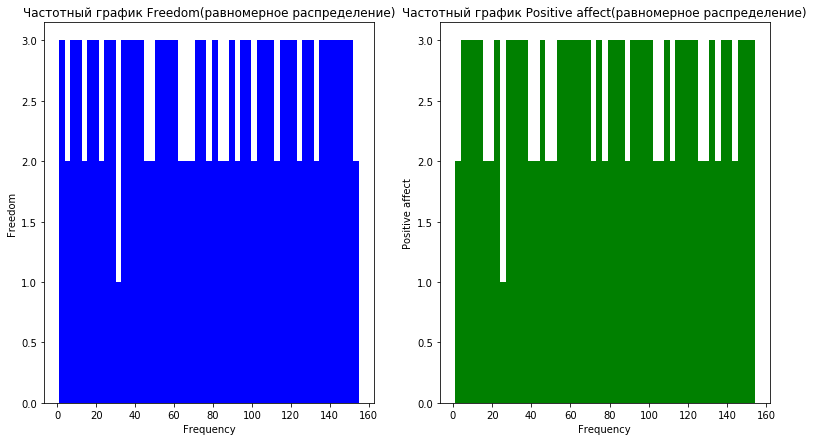

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(13, 7))
n_bins = 53

axs[0].hist(df2['Freedom'], bins=n_bins, facecolor='b')
axs[0].set_xlabel('Frequency')
axs[0].set_ylabel('Freedom')
axs[0].set_title('Частотный график Freedom(равномерное распределение)')


axs[1].hist(df2['Positive affect'], bins=n_bins, facecolor='g')
axs[1].set_xlabel('Frequency')
axs[1].set_ylabel('Positive affect')
axs[1].set_title('Частотный график Positive affect(равномерное распределение)')

plt.show()

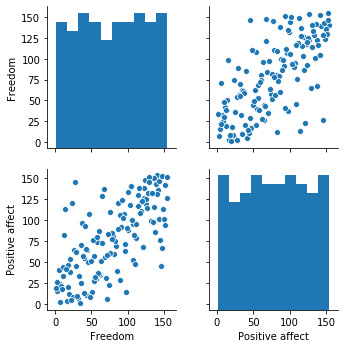

In [7]:
import seaborn as sns
df3 = df2[['Freedom','Positive affect']]
g = sns.pairplot(df3)

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [207]:
print('Медиана выборки Freedom: ', statistics.median(df2['Freedom']))
Freedom = df2['Freedom']
#print('Мода выборки Freedom: ', statistics.mode(df['Freedom']))
print('Математическое ожидание выборки Freedom: ', (max(Freedom)+min(Freedom))/2)
print('Стандартное отклонение выборки Freedom: ', statistics.pstdev(Freedom))
print('Дисперсия выборки Freedom: ', statistics.pvariance(Freedom))
print('Максимум выборки Freedom: ', max(Freedom))
print('Минимум выборки Freedom: ', min(Freedom))
print('Выбросы выборки Freedom: отсутствующие значения -', df['Freedom'].isnull().sum())
print('Размах выборки Freedom: ', max(Freedom)-min(Freedom))

Медиана выборки Freedom:  79.5
Математическое ожидание выборки Freedom:  78.0
Стандартное отклонение выборки Freedom:  44.9475794449399
Дисперсия выборки Freedom:  2020.2848979591836
Максимум выборки Freedom:  155.0
Минимум выборки Freedom:  1.0
Выбросы выборки Freedom: отсутствующие значения - 1
Размах выборки Freedom:  154.0


Почему нельзя найти моду?

In [0]:
Потому что в данной выборке df['Freedom'] все числа встречаются одинаково, 
а в таких случаях срабатывает прописанное предупреждение StatisticsError. 

Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

Коэффициент корреляции Пирсона: 0.696567045809068


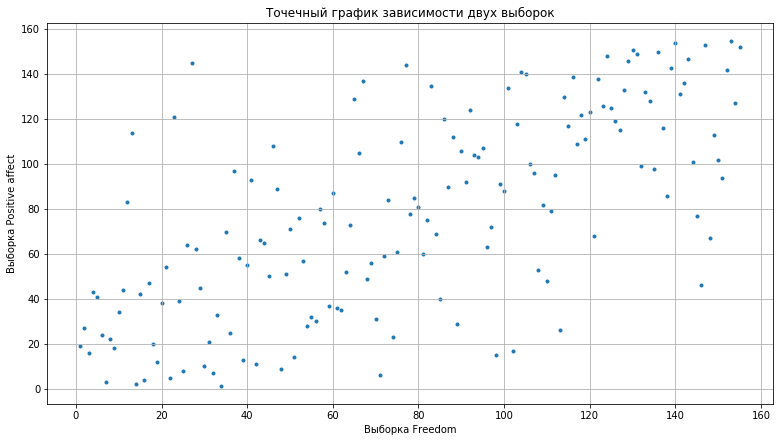

In [193]:
plt.xlabel('Выборка Freedom')
plt.ylabel('Выборка Positive affect')
plt.title('Точечный график зависимости двух выборок')
plt.grid(True)
plt.scatter(df['Freedom'], df['Positive affect'], marker='.')

from scipy.stats import pearsonr

corr, p_value = pearsonr(df2['Freedom'], df2['Positive affect'])
print('Коэффициент корреляции Пирсона:', corr)
# в данном случае знак коэффициент корреляции говорит о том, что выборки содержат сильную прямую связь - зависимы друг от друга.

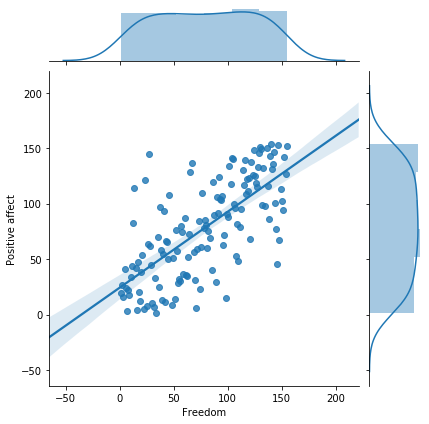

In [202]:
import seaborn as sns
sns.jointplot(x=df2['Freedom'], y=df2['Positive affect'], 
              data=df2, kind='reg')

Нормализовать данные колонки Freedom (централизация + масштабирование)

In [217]:
print('Среднее значение выборки Freedom(не равное 0):', statistics.mean(df2['Freedom']))
freedom_1 = df2['Freedom'] - statistics.mean(df2['Freedom'])
print('Центирование:', statistics.mean(freedom_1))
print('Минимум выборки Freedom:', min(freedom_1))
print('Максимум выборки Freedom:', max(freedom_1))

from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

freedom_2 = min_max_scaler.fit_transform(np.array(freedom_1).reshape(-1, 1))
print('Масштабирование')
print(min(freedom_2))
print(max(freedom_2))

Среднее значение выборки Freedom: 78.82857142857142
Среднее значение(не равное 0) 6.496390726949487e-15
Минимум выборки Freedom: -77.82857142857142
Максимум выборки Freedom: 76.17142857142858
[-1.]
[1.]


Построить матрицу корреляций для всех колонок таблицы

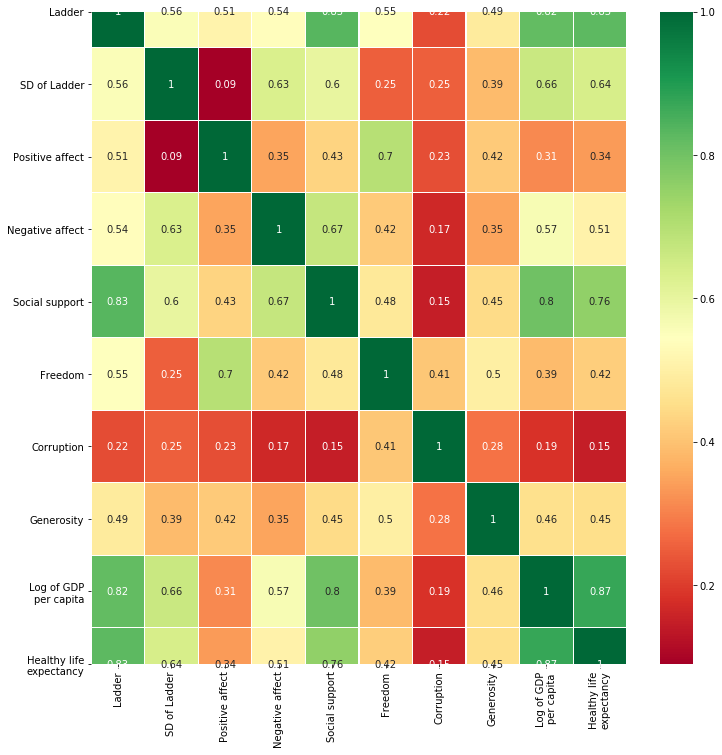

In [227]:
import seaborn as sns
sns.heatmap(df2.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->матрица корреляций
# gcf() - получение текущей фигуры
fig=plt.gcf()
# set_size_inches() - установить размер фигуры
fig.set_size_inches(12,12)
plt.show()

Загрузить таблицу цен на авокадо: 

In [4]:
import io
import requests

df=pd.read_csv('avocado.csv')
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

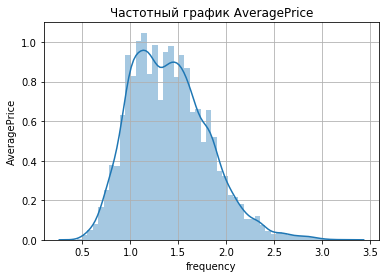

In [15]:
import seaborn as sns
n = sns.distplot(df['AveragePrice'])

plt.xlabel('frequency')
plt.ylabel('AveragePrice')
plt.title('Частотный график AveragePrice(нормальное распределение)')
plt.grid(True)
plt.show()

Найти корреляцию в следующих колонках:

колонкой 4046, 4225, 4770 и Average Price. Если корелляция есть (обратная или прямая), то какие выводы можно сделать?

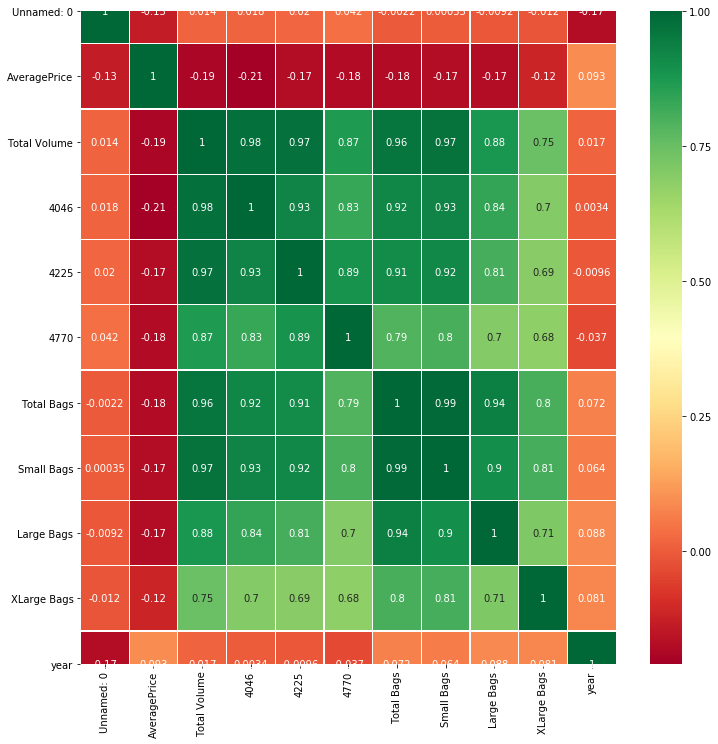

In [16]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()
# Между выборками 4046, 4225, 4770 сильная прямая корреляция, что говорит об их сильной взаимосвязи. 
# Однако, выборки 4046, 4225, 4770 почти никак не связаны с выборкой Average Price, значит изменения данных одной выборки
# не повлияют на данные выборки Average Price.